<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/InitialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

fatal: destination path 'PythonForMachineLearning' already exists and is not an empty directory.


In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Biases and assumptions


-Longer flight will be more expensive

-Business flights will be more expensive than
Economical one

-Business flights will be faster than economical one, but they also will flew longer distances.

-There will be more economical flights


#Related work:


##Flight Fare Prediction | 10 ML Models
https://www.kaggle.com/code/varunsaikanuri/flight-fare-prediction-10-ml-models

This work focused on predicting price based on features. It was done in python jupiter.
Autor tested multiple regression models like:
- Linear
- Decision Tree
- Extra Regression Tree
- Random Forest
- KNN
- Ridge
- Lasso

The best results gave Extra Trees

##AirLinePrice-Regression
https://www.kaggle.com/code/nimapourmoradi/airlineprice-regression




#Preparing Data

##Loading Data

In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data.head()


Mapping words to numbers for columns: departure time, arival time and stops

In [ ]:
time=data['departure_time'].unique()
print(time)

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


In [ ]:
from time import time
from sklearn.model_selection import train_test_split
stops_mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}



time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

data['stops'] = data['stops'].map(stops_mapping)
data['departure_time'] = data['departure_time'].map(time_mapping)
data['arrival_time'] = data['arrival_time'].map(time_mapping)


X=data.drop(["duration","Unnamed: 0","flight","days_left"],axis=1)
y=data["duration"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=1 )
X_train.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
107174,AirAsia,Bangalore,4,0,5,Kolkata,Economy,3393
183692,GO_FIRST,Chennai,0,1,2,Delhi,Economy,4827
208304,Vistara,Delhi,2,0,3,Mumbai,Business,34472
116440,Vistara,Bangalore,4,1,1,Chennai,Economy,9420
65996,Air_India,Mumbai,0,1,1,Kolkata,Economy,6105


In [ ]:
y_train.head()

,duration
107174,2.42
183692,7.17
208304,2.17
116440,11.17
65996,24.08


#Visualization of data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data1=X_train["airline"].sort_values()
uAirline=data1.unique()
print(uAirline)


['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']


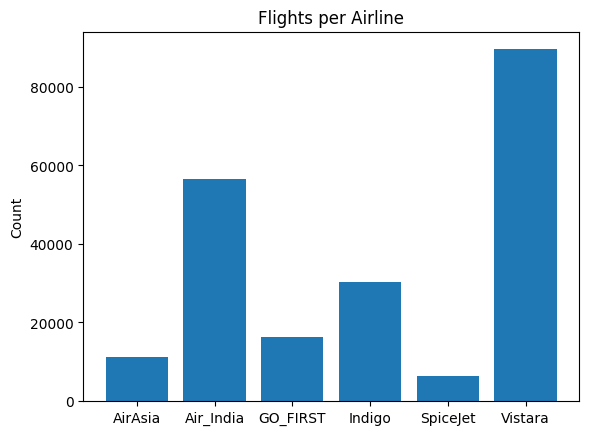

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

cAirlines=Counter(data1)

name_list = list(cAirlines.keys())
count_list = list(cAirlines.values())
plt.bar(name_list,count_list)
plt.title('Flights per Airline')
plt.ylabel('Count')
plt.show()

In [ ]:
data2=X_train["class"].sort_values()

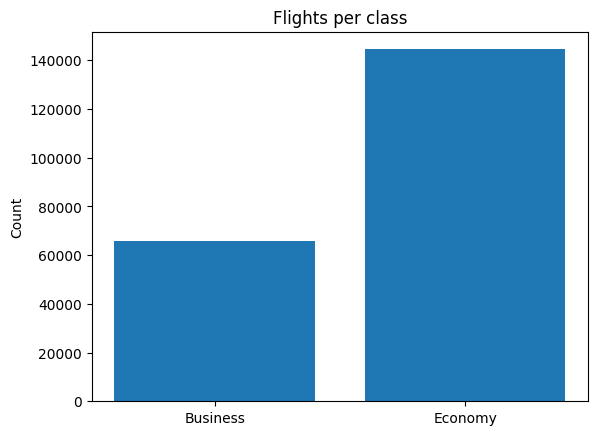

In [ ]:
clas=Counter(data2)
name_list = list(clas.keys())
count_list = list(clas.values())
plt.bar(name_list,count_list)
plt.title('Flights per class')
plt.ylabel('Count')
plt.show()

In [ ]:
data3=X_train["stops"].sort_values()

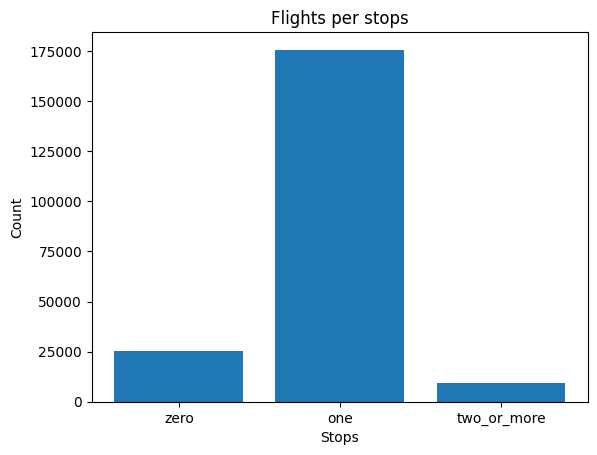

In [ ]:
stops=Counter(data3)
name_list = list(stops.keys())
count_list = list(stops.values())
plt.bar(name_list,count_list)
plt.title('Flights per stops')
plt.ylabel('Count')
plt.xlabel('Stops')
plt.xticks([0,1,2],['zero','one','two_or_more'])
plt.show()

In [ ]:
data4=X_train["departure_time"].sort_values()

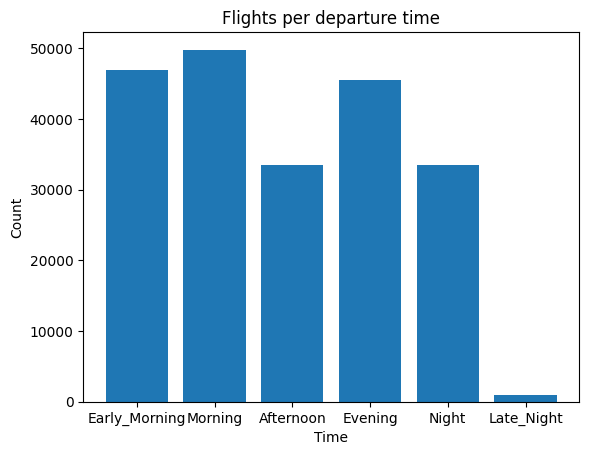

In [ ]:
cnt=Counter(data4)
name_list = list(cnt.keys())
count_list = list(cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per departure time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

In [ ]:
data5=X_train["arrival_time"].sort_values()

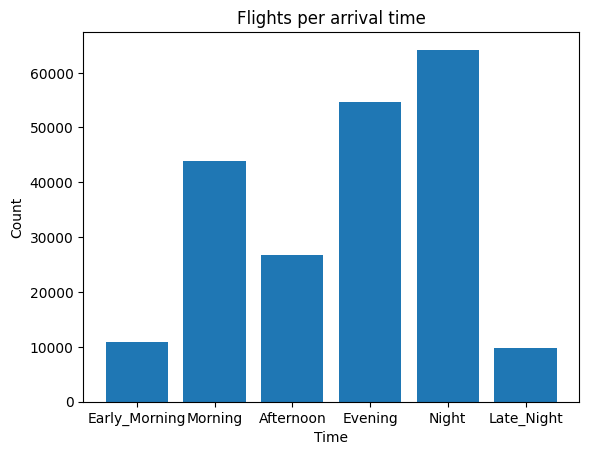

In [ ]:
cnt=Counter(data5)
name_list = list(cnt.keys())
count_list = list(cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per arrival time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

In [ ]:
data6=X_train.groupby("airline")
air={}
for i in uAirline:
  plt.boxplot(data6.get_group(i)['price'])
  plt.title(i)
  plt.ylabel('Price')
plt.show()




NameError: name 'X_train' is not defined

Text(120.72222222222221, 0.5, 'Source City')

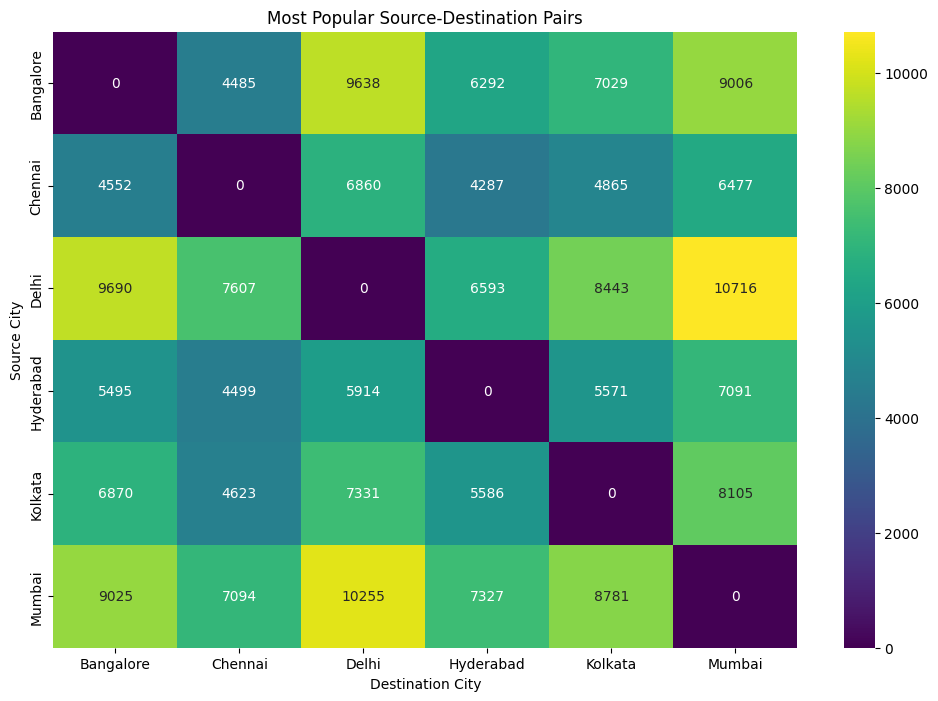

In [ ]:
city_pairs = pd.crosstab(X_train['source_city'], X_train['destination_city'])
plt.figure(figsize=(12, 8))
sns.heatmap(city_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Source-Destination Pairs")
plt.xlabel("Destination City")
plt.ylabel("Source City")

([<matplotlib.axis.YTick at 0x7ccfc7344e50>,
 [Text(0, 0, 'Early_Morning'),
  Text(0, 1, 'Morning'),
  Text(0, 2, 'Afternoon'),
  Text(0, 3, 'Evening'),
  Text(0, 4, 'Night'),
  Text(0, 5, 'Late_Night')])

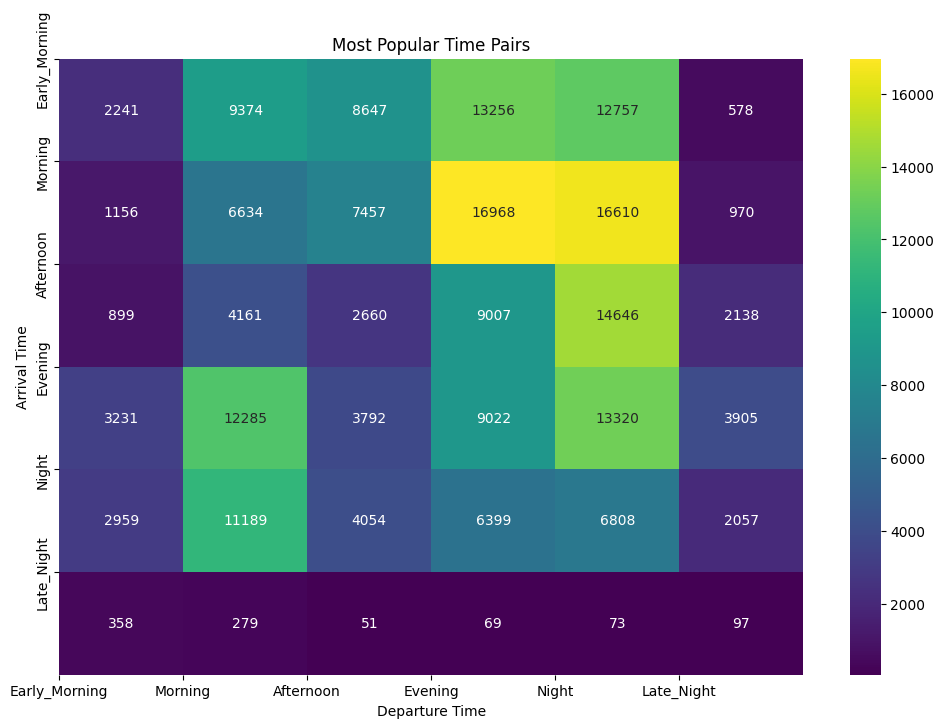

In [ ]:
time_pairs = pd.crosstab(X_train['departure_time'], X_train['arrival_time'])
plt.figure(figsize=(12, 8))
sns.heatmap(time_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Time Pairs")
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.yticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])

#Project task

We chosen dataset for Flight Price Prediction

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Our project centers on the topic of flight duration prediction.

While traditional approaches in transportation forecasting have largely concentrated on price predictions, we seek to shift the focus towards predicting travel time.
This fresh perspective aims to omprove the travel experience by providing insights that are crucial for passengers planning their journeys.

To achieve this, we will analyze a dataset featuring key attributes such as airline, destination city, departure city, class, departure time, and price—all accessible to potential passengers during the booking process.

We aspire to equip travelers with the tools they need to make informed decisions and effectively minimize their time in the air.

We want to know how to predict duration of a flight, based on features like place of origin, airline,	departure time, stops,	destination city,	class, price.

Questions:

  - Does duration changes if flight starts during the day or at night.
  -
